In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data =pd.read_csv("C:\\Users\\keesi\\Re_Beauty_R2.csv")
data.head(5)

,summary,overall,Sentiment,h,reviewerID,asin,year,month,day,reviewTime,Po
0,dont wast moneyveri oili creami expect order t...,1,Negative,42.857143,A1YJEY40YUW4SE,7806397051,2014,1,30,30-01-2014,0.000000
1,ok palettethi palett decent price look differ ...,3,Positive,50.000000,A60XNB876KYML,7806397051,2014,4,18,18-04-2014,0.277778
2,great qualityth textur conceal pallet fantast ...,4,Positive,0.000000,A3G6XNM240RMWA,7806397051,2013,9,6,06-09-2013,0.300000
3,work facei realli cant tell exactli thing powd...,2,Negative,50.000000,A1PQFP6SAJ6D80,7806397051,2013,12,8,08-12-2013,0.233333
4,okayit littl smaller expect okay last long tim...,3,Positive,0.000000,A38FVHZTNQ271F,7806397051,2013,10,19,19-10-2013,0.275000


In [2]:
data1=data[data.Sentiment!='Neautral']
data1['Sentiment'].replace('Positive',1,inplace=True)
data1['Sentiment'].replace('Negative',0,inplace=True)
data1.Sentiment.value_counts()

1    172830
0     24638
Name: Sentiment, dtype: int64

In [3]:
X = data['summary']
y = data['Sentiment']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression()

In [7]:
y_pred_class = model.predict(X_test_dtm)

In [8]:
accuracy_score(y_test, y_pred_class)

0.9099060976101238

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred_class)
print(cm)

[[   38    61   156]
 [   29  3440  2715]
 [   24  1486 41677]]


Text(0.5, 15.0, 'Predicted label')

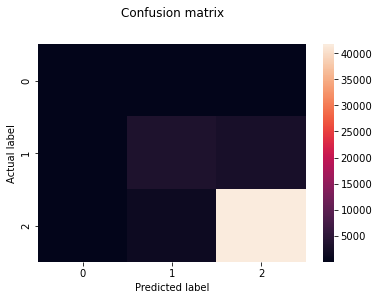

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(pd.DataFrame(cm))
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')


In [13]:
!pip install scikit-plot

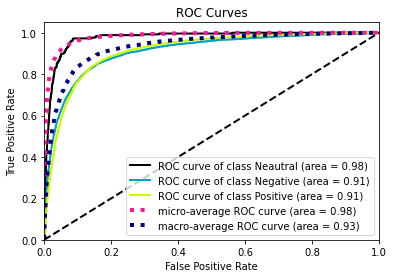

In [15]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = model.predict_proba(X_test_dtm)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

    Neautral       0.42      0.15      0.22       255
    Negative       0.69      0.56      0.62      6184
    Positive       0.94      0.97      0.95     43187

    accuracy                           0.91     49626
   macro avg       0.68      0.56      0.60     49626
weighted avg       0.90      0.91      0.90     49626

